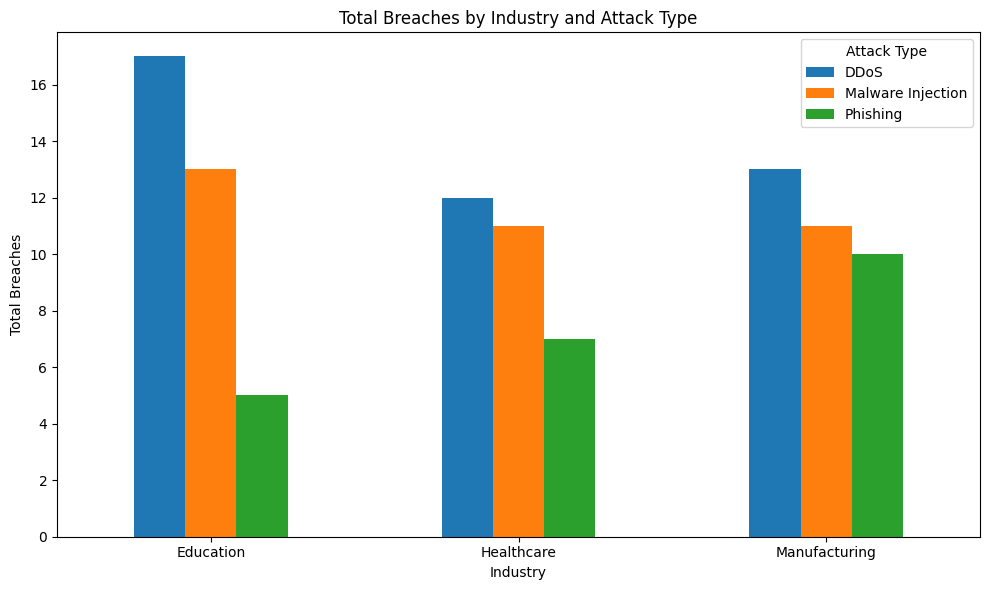

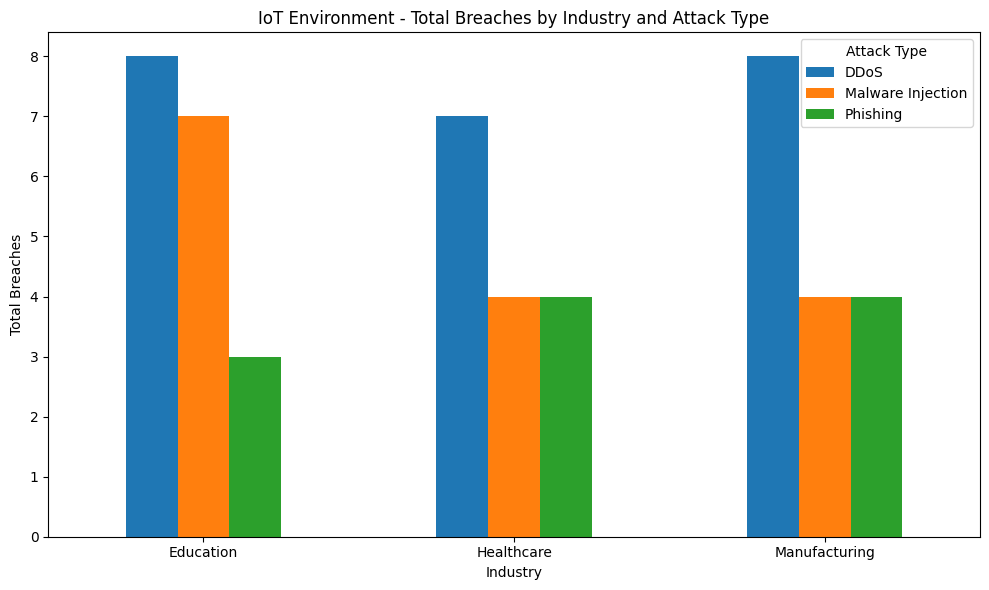

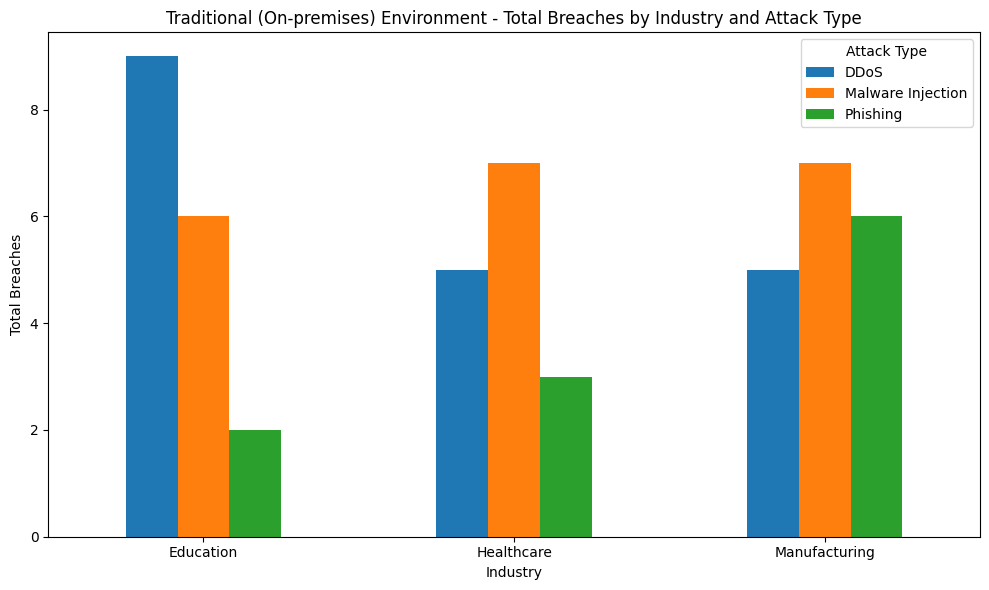

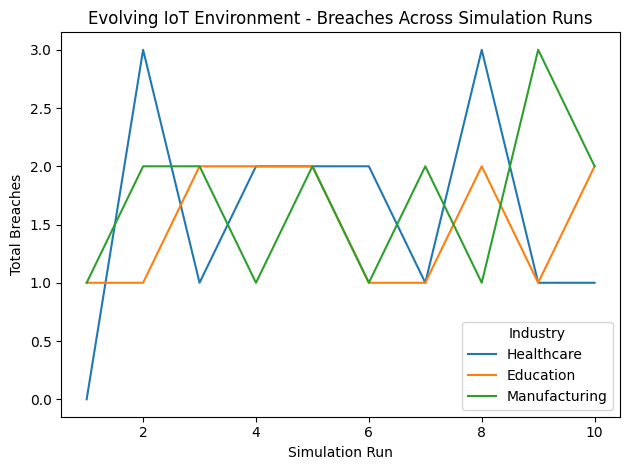

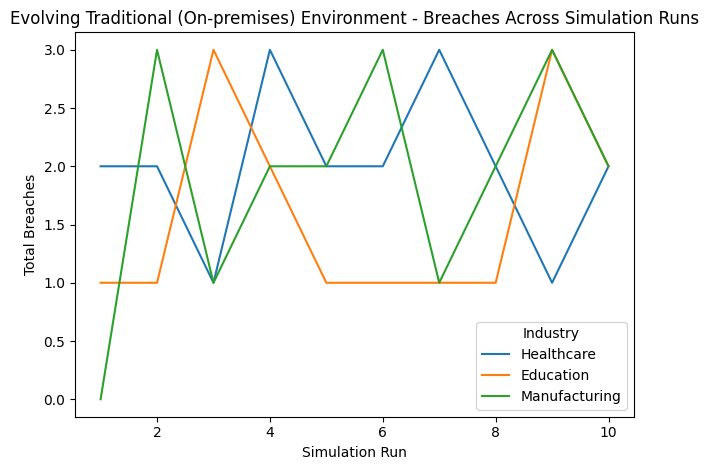

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# If the file is in your Google Drive (optional usage):
file_path = '/content/drive/MyDrive/Security Breach samples.csv'

# Define environments and industries
industries = ["Healthcare", "Education", "Manufacturing"]
environments = ["On-premises", "IoT"]
attack_types = ["DDoS", "Phishing", "Malware Injection"]

# Function to simulate DDoS attack
def simulate_ddos(environment):
    breach_probability = 0.8 if environment == "IoT" else 0.6
    return breach_probability

# Function to simulate Phishing attack
def simulate_phishing(environment):
    breach_probability = 0.4 if environment == "IoT" else 0.3
    return breach_probability

# Function to simulate Malware Injection attack
def simulate_malware_injection(environment):
    breach_probability = 0.5 if environment == "IoT" else 0.7
    return breach_probability

# Dictionary to hold simulation results
simulation_results = {
    "Industry": [],
    "Environment": [],
    "Attack_Type": [],
    "Breaches": []
}

# Run simulations
for industry in industries:
    for environment in environments:
        for attack_type in attack_types:
            breaches = 0
            for _ in range(10):  # Simulate 10 times for each combination
                if attack_type == "DDoS":
                    breach_probability = simulate_ddos(environment)
                elif attack_type == "Phishing":
                    breach_probability = simulate_phishing(environment)
                elif attack_type == "Malware Injection":
                    breach_probability = simulate_malware_injection(environment)

                if random.random() < breach_probability:
                    breaches += 1

            # Store results
            simulation_results["Industry"].append(industry)
            simulation_results["Environment"].append(environment)
            simulation_results["Attack_Type"].append(attack_type)
            simulation_results["Breaches"].append(breaches)

# Convert results to DataFrame
df = pd.DataFrame(simulation_results)

# Group the data by Industry and Attack_Type for a bar plot
grouped_df = df.groupby(['Industry', 'Attack_Type'])['Breaches'].sum().unstack()

# Plot the results
grouped_df.plot(kind='bar', figsize=(10, 6))
plt.title('Total Breaches by Industry and Attack Type')
plt.xlabel('Industry')
plt.ylabel('Total Breaches')
plt.xticks(rotation=0)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()

# Separate data into IoT and Traditional (On-premises) environments
iot_df = df[df['Environment'] == 'IoT']
traditional_df = df[df['Environment'] == 'On-premises']

# Save the separated data to CSV files
iot_df.to_csv('iot_environment_results.csv', index=False)
traditional_df.to_csv('traditional_environment_results.csv', index=False)

# Function to plot results
def plot_results(data, title):
    grouped_df = data.groupby(['Industry', 'Attack_Type'])['Breaches'].sum().unstack()
    grouped_df.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.xlabel('Industry')
    plt.ylabel('Total Breaches')
    plt.xticks(rotation=0)
    plt.legend(title='Attack Type')
    plt.tight_layout()
    plt.show()

# Plot IoT environment results
plot_results(iot_df, "IoT Environment - Total Breaches by Industry and Attack Type")

# Plot Traditional (On-premises) environment results
plot_results(traditional_df, "Traditional (On-premises) Environment - Total Breaches by Industry and Attack Type")


# Function to simulate evolving DDoS attack
def evolving_ddos(environment, run):
    base_probability = 0.8 if environment == "IoT" else 0.6
    # Increase probability slightly with each run
    return min(1.0, base_probability + run * 0.01)

# Function to simulate evolving Phishing attack
def evolving_phishing(environment, run):
    base_probability = 0.4 if environment == "IoT" else 0.3
    # Increase probability slightly with each run
    return min(1.0, base_probability + run * 0.01)

# Function to simulate evolving Malware Injection attack
def evolving_malware_injection(environment, run):
    base_probability = 0.5 if environment == "IoT" else 0.7
    # Increase probability slightly with each run
    return min(1.0, base_probability + run * 0.01)


# Dictionary to hold evolving simulation results
simulation_results_evolving = {
    "Industry": [],
    "Environment": [],
    "Attack_Type": [],
    "Breaches": [],
    "Run": []
}

# Simulate evolving attacks over time
for industry in industries:
    for environment in environments:
        for attack_type in attack_types:
            for run in range(10):  # Simulate 10 times for each combination
                breaches = 0
                if attack_type == "DDoS":
                    breach_probability = evolving_ddos(environment, run + 1)
                elif attack_type == "Phishing":
                    breach_probability = evolving_phishing(environment, run + 1)
                elif attack_type == "Malware Injection":
                    breach_probability = evolving_malware_injection(environment, run + 1)

                # Simulate if breach occurs
                if random.random() < breach_probability:
                    breaches += 1

                # Store results
                simulation_results_evolving["Industry"].append(industry)
                simulation_results_evolving["Environment"].append(environment)
                simulation_results_evolving["Attack_Type"].append(attack_type)
                simulation_results_evolving["Breaches"].append(breaches)
                simulation_results_evolving["Run"].append(run + 1)

# Convert evolving results to DataFrame
df_evolving = pd.DataFrame(simulation_results_evolving)

# Separate evolving data for IoT and Traditional environments
iot_df_evolving = df_evolving[df_evolving['Environment'] == 'IoT']
traditional_df_evolving = df_evolving[df_evolving['Environment'] == 'On-premises']

# Function to plot line charts of evolving breaches
def plot_line_chart(data, title):
    for industry in industries:
        industry_data = data[data['Industry'] == industry]
        grouped_df = industry_data.groupby('Run')['Breaches'].sum()
        plt.plot(grouped_df, label=industry)

    plt.title(title)
    plt.xlabel('Simulation Run')
    plt.ylabel('Total Breaches')
    plt.legend(title='Industry')
    plt.tight_layout()
    plt.show()

# Plot evolving results
plot_line_chart(iot_df_evolving, "Evolving IoT Environment - Breaches Across Simulation Runs")
plot_line_chart(traditional_df_evolving, "Evolving Traditional (On-premises) Environment - Breaches Across Simulation Runs")